In [1]:
import pandas as pd
import numpy as np
import datetime

#### Defino el tipo de datos

In [2]:
dtype_dic= {"DayofMonth": 'str', "Year": 'str',"Month": 'str',"DepTime": 'str', "ArrTime": 'str','AirTime':'str',"ActualElapsedTime": 'str',"CRSElapsedTime": 'str',"AirTime":'str',"ArrDelay":'str',"DepDelay":'str',"TaxiIn":'str',"TaxiOut":'str',"CarrierDelay":'str',"WeatherDelay":'str',"NASDelay":'str',"SecurityDelay":'str',}

In [3]:
dfc = pd.read_csv('DelayedFlights.csv',index_col=0,dtype=dtype_dic)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
dfc.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
dfc.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


####  Columnas relevantes

In [8]:
dfr=dfc[['Year','Month','DayofMonth','DepTime','CRSDepTime','ArrTime','CRSArrTime','UniqueCarrier','FlightNum','TailNum','AirTime','ArrDelay','Distance','Cancelled','CancellationCode','DepDelay']].copy()

In [9]:
dfr.head()

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Distance,Cancelled,CancellationCode,DepDelay
0,2008,1,3,2003.0,1955,2211.0,2225,WN,335,N712SW,116.0,-14.0,810,0,N,8.0
1,2008,1,3,754.0,735,1002.0,1000,WN,3231,N772SW,113.0,2.0,810,0,N,19.0
2,2008,1,3,628.0,620,804.0,750,WN,448,N428WN,76.0,14.0,515,0,N,8.0
4,2008,1,3,1829.0,1755,1959.0,1925,WN,3920,N464WN,77.0,34.0,515,0,N,34.0
5,2008,1,3,1940.0,1915,2121.0,2110,WN,378,N726SW,87.0,11.0,688,0,N,25.0


####  Ajuste de los formatos

In [10]:
dfr['DayofMonthT']= dfr['DayofMonth'].apply(lambda x: x.zfill(2))
dfr['MonthT']= dfr['Month'].apply(lambda x: x.zfill(2))


In [11]:
dfr['fechacompl'] = pd.to_datetime(dfr['Year']+ dfr['Month']+dfr['DayofMonth'],format= '%Y%m%d' )

####  Resumen estadistico de las columnas

In [12]:
dfr.describe(include='all')

<ipython-input-12-0dd9819fb342>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfr.describe(include='all')


,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Distance,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl
count,1936758,1936758,1936758,1936758,1.936758e+06,1929648,1.936758e+06,1936758,1.936758e+06,1936753,1928371,1928371,1.936758e+06,1.936758e+06,1936758,1936758,1936758,1936758,1936758
unique,1,12,31,1438,NaN,1440,NaN,20,NaN,5366,650,1128,NaN,NaN,4,1058,31,12,348
top,2008,12,22,1800.0,NaN,2100.0,NaN,WN,NaN,N325SW,45.0,10.0,NaN,NaN,N,6.0,22,12,2008-12-01 00:00:00
freq,1936758,203385,71649,3188,NaN,2982,NaN,377602,NaN,965,18374,36291,NaN,NaN,1936125,91605,71649,203385,18226
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-12-31 00:00:00
mean,NaN,NaN,NaN,NaN,1.467473e+03,NaN,1.634225e+03,NaN,2.184263e+03,NaN,NaN,NaN,7.656862e+02,3.268348e-04,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,4.247668e+02,NaN,4.646347e+02,NaN,1.944702e+03,NaN,NaN,NaN,5.744797e+02,1.807562e-02,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,1.100000e+01,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.135000e+03,NaN,1.325000e+03,NaN,6.100000e+02,NaN,NaN,NaN,3.380000e+02,0.000000e+00,NaN,NaN,NaN,NaN,NaN


####  Datos faltantes por columna Resumen

In [13]:
dfr.isnull().sum()

Year                   0
Month                  0
DayofMonth             0
DepTime                0
CRSDepTime             0
ArrTime             7110
CRSArrTime             0
UniqueCarrier          0
FlightNum              0
TailNum                5
AirTime             8387
ArrDelay            8387
Distance               0
Cancelled              0
CancellationCode       0
DepDelay               0
DayofMonthT            0
MonthT                 0
fechacompl             0
dtype: int64

#### Datos Faltantes en %

In [14]:
(dfr.isnull().sum()/len(dfr)).round(4)

Year                0.0000
Month               0.0000
DayofMonth          0.0000
DepTime             0.0000
CRSDepTime          0.0000
ArrTime             0.0037
CRSArrTime          0.0000
UniqueCarrier       0.0000
FlightNum           0.0000
TailNum             0.0000
AirTime             0.0043
ArrDelay            0.0043
Distance            0.0000
Cancelled           0.0000
CancellationCode    0.0000
DepDelay            0.0000
DayofMonthT         0.0000
MonthT              0.0000
fechacompl          0.0000
dtype: float64

#### Datos completos en %


In [15]:
(dfr.notnull().sum()/len(dfr)).round(4)

Year                1.0000
Month               1.0000
DayofMonth          1.0000
DepTime             1.0000
CRSDepTime          1.0000
ArrTime             0.9963
CRSArrTime          1.0000
UniqueCarrier       1.0000
FlightNum           1.0000
TailNum             1.0000
AirTime             0.9957
ArrDelay            0.9957
Distance            1.0000
Cancelled           1.0000
CancellationCode    1.0000
DepDelay            1.0000
DayofMonthT         1.0000
MonthT              1.0000
fechacompl          1.0000
dtype: float64

####  Velocidad media 
- milesmtokmh constanta para pasar de millas min a km/h


In [16]:
milesmtokmh=60/0.62137

In [17]:
dfr['AirTime']=dfr[dfr['AirTime'].notnull()]['AirTime'].apply(lambda s: int(s[:s.find(".")]))

In [18]:
dfr['VelocidadMedia']=dfr['Distance']*milesmtokmh/(dfr['AirTime'])

In [19]:
dfr['VelocidadMedia'].head()

0    674.260935
1    692.161668
2    654.326645
4    645.828896
5    763.607446
Name: VelocidadMedia, dtype: float64

Limpio velocidad media para encontrar min max etc..


In [20]:
dfr['VelocidadMedial']=dfr['VelocidadMedia'].apply(lambda x: -1 if x== np.inf  else x)

####  Velocidad minima

In [21]:

dfr[dfr['VelocidadMedial'] > 0]['VelocidadMedial'].min()

34.2635186453243

####  Velocidad Maxima


In [22]:
dfr['VelocidadMedial'].max()

89994.68915460998

####  Velocidad media

In [23]:
dfr['VelocidadMedial'].mean()

638.8322966482912

####  Vuelos con la velocidad superior a la media

In [24]:
dfr[dfr['VelocidadMedial']>=dfr['VelocidadMedial'].mean()]

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Distance,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl,VelocidadMedia,VelocidadMedial
0,2008,1,3,2003.0,1955,2211.0,2225,WN,335,N712SW,116.0,-14.0,810,0,N,8.0,03,01,2008-01-03,674.260935,674.260935
1,2008,1,3,754.0,735,1002.0,1000,WN,3231,N772SW,113.0,2.0,810,0,N,19.0,03,01,2008-01-03,692.161668,692.161668
2,2008,1,3,628.0,620,804.0,750,WN,448,N428WN,76.0,14.0,515,0,N,8.0,03,01,2008-01-03,654.326645,654.326645
4,2008,1,3,1829.0,1755,1959.0,1925,WN,3920,N464WN,77.0,34.0,515,0,N,34.0,03,01,2008-01-03,645.828896,645.828896
5,2008,1,3,1940.0,1915,2121.0,2110,WN,378,N726SW,87.0,11.0,688,0,N,25.0,03,01,2008-01-03,763.607446,763.607446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009699,2008,12,13,1254.0,1221,1420.0,1359,DL,1609,N977DL,64.0,21.0,432,0,N,33.0,13,12,2008-12-13,651.785571,651.785571
7009702,2008,12,13,1531.0,1522,1822.0,1823,DL,1612,N916DN,88.0,-1.0,692,0,N,9.0,13,12,2008-12-13,759.319217,759.319217
7009705,2008,12,13,921.0,830,1112.0,1008,DL,1616,N907DE,82.0,64.0,545,0,N,51.0,13,12,2008-12-13,641.776217,641.776217
7009710,2008,12,13,1250.0,1220,1617.0,1552,DL,1621,N938DL,120.0,25.0,906,0,N,30.0,13,12,2008-12-13,729.034231,729.034231


#### Vuelo con la velocidad media mas rapida


In [25]:
dfr[dfr['VelocidadMedial']==dfr['VelocidadMedial'].max()]

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Distance,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl,VelocidadMedia,VelocidadMedial
3935840,2008,7,11,1015.0,1002,1249.0,1234,EV,4200,N823AS,1.0,15.0,932,0,N,13.0,11,07,2008-07-11,89994.689155,89994.689155


#### Vuelo con la velocidad media mas lenta

In [26]:
dfr[dfr['VelocidadMedia']==dfr['VelocidadMedia'].min()]

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Distance,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl,VelocidadMedia,VelocidadMedial
2547298,2008,5,15,2037.0,1800,2125.0,1900,OH,4988,N806CA,31.0,145.0,11,0,N,157.0,15,05,2008-05-15,34.263519,34.263519


####  Vuelos mas largos

In [27]:
dfl=dfr.copy()

In [28]:
dfl.sort_values(by='Distance', ascending=False)

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Distance,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl,VelocidadMedia,VelocidadMedial
4200196,2008,7,18,2001.0,1955,1126.0,1130,CO,14,N67058,543.0,-4.0,4962,0,N,6.0,18,07,2008-07-18,882.384558,882.384558
6979519,2008,12,20,2333.0,2055,1348.0,1120,CO,14,N66056,528.0,148.0,4962,0,N,158.0,20,12,2008-12-20,907.452301,907.452301
2353671,2008,4,25,1345.0,1335,1826.0,1810,CO,15,N69059,620.0,16.0,4962,0,N,10.0,25,04,2008-04-25,772.798089,772.798089
6982535,2008,12,16,2135.0,2055,1148.0,1120,CO,14,N76054,523.0,28.0,4962,0,N,40.0,16,12,2008-12-16,916.127753,916.127753
566426,2008,1,13,1326.0,1320,1912.0,1920,CO,15,N67058,621.0,-8.0,4962,0,N,6.0,13,01,2008-11-03,771.553647,771.553647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989833,2008,9,22,1340.0,1325,1553.0,1425,OH,6898,N710CA,27.0,88.0,30,0,N,15.0,22,09,2008-09-22,107.289806,107.289806
151660,2008,1,2,1245.0,1025,1340.0,1125,OH,5610,N806CA,11.0,135.0,24,0,N,140.0,02,01,2008-01-02,210.678164,210.678164
1637250,2008,3,12,955.0,931,1021.0,948,9E,2009,91619E,10.0,33.0,24,0,N,24.0,12,03,2008-03-12,231.745981,231.745981
2547298,2008,5,15,2037.0,1800,2125.0,1900,OH,4988,N806CA,31.0,145.0,11,0,N,157.0,15,05,2008-05-15,34.263519,34.263519


In [29]:
maslargos=dfl.sort_values(by='Distance', ascending=False)

In [30]:
maslargos[['FlightNum','TailNum','Distance']]

,FlightNum,TailNum,Distance
4200196,14,N67058,4962
6979519,14,N66056,4962
2353671,15,N69059,4962
6982535,14,N76054,4962
566426,15,N67058,4962
...,...,...,...
4989833,6898,N710CA,30
151660,5610,N806CA,24
1637250,2009,91619E,24
2547298,4988,N806CA,11


In [31]:
uniqueValues = dfl['Distance'].unique()

In [32]:
a=np.array(uniqueValues)

In [33]:
uniqueValues=-np.sort(-a)

####  Top  de distancias mas largas de vuelos

In [34]:
dfl[dfl['Distance'].isin(uniqueValues[0:3])]

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Distance,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl,VelocidadMedia,VelocidadMedial
218178,2008,1,1,1030.0,1010,1541.0,1522,UA,1,N213UA,517.0,19.0,4243,0,N,20.0,01,01,2008-01-01,792.471144,792.471144
218179,2008,1,2,1037.0,1010,1535.0,1522,UA,1,N211UA,515.0,13.0,4243,0,N,27.0,02,01,2008-01-02,795.548702,795.548702
218180,2008,1,3,1028.0,1010,1515.0,1522,UA,1,N212UA,511.0,-7.0,4243,0,N,18.0,03,01,2008-01-03,801.776089,801.776089
218182,2008,1,5,1129.0,1010,1700.0,1522,UA,1,N215UA,525.0,98.0,4243,0,N,79.0,05,01,2008-01-05,780.395394,780.395394
218183,2008,1,6,1038.0,1010,1554.0,1522,UA,1,N214UA,527.0,32.0,4243,0,N,28.0,06,01,2008-01-06,777.433741,777.433741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005928,2008,12,10,1149.0,1035,1627.0,1515,DL,1273,N834MH,554.0,72.0,4502,0,N,74.0,10,12,2008-12-10,784.687428,784.687428
7007213,2008,12,11,1229.0,1035,1644.0,1515,DL,1273,N828MH,533.0,89.0,4502,0,N,114.0,11,12,2008-12-11,815.603819,815.603819
7007224,2008,12,11,1720.0,1650,708.0,632,DL,1282,N829MH,498.0,36.0,4502,0,N,30.0,11,12,2008-12-11,872.925372,872.925372
7008525,2008,12,12,1057.0,1035,1541.0,1515,DL,1273,N832MH,556.0,26.0,4502,0,N,22.0,12,12,2008-12-12,781.864812,781.864812


In [35]:
dflf=dfl.groupby('Distance').first().reset_index()

In [36]:
dflf.iloc[::-1]

,Distance,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl,VelocidadMedia,VelocidadMedial
1418,4962,2008,1,14,1331.0,1320,1905.0,1920,CO,15,N69063,605.0,-15.0,0,N,11.0,14,01,2008-11-04,791.958372,791.958372
1417,4502,2008,1,17,2223.0,1900,1157.0,844,DL,850,N836MH,486.0,193.0,0,N,203.0,17,01,2008-11-07,894.479085,894.479085
1416,4243,2008,1,1,1030.0,1010,1541.0,1522,UA,1,N213UA,517.0,19.0,0,N,20.0,01,01,2008-01-01,792.471144,792.471144
1415,4213,2008,1,1,1807.0,1800,552.0,550,UA,3,N211UA,444.0,2.0,0,N,7.0,01,01,2008-01-01,916.240443,916.240443
1414,4184,2008,1,1,1014.0,954,1514.0,1501,UA,3,N211UA,516.0,13.0,0,N,20.0,01,01,2008-01-01,782.966072,782.966072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,35,2008,5,15,941.0,921,1008.0,929,XE,16,N12195,14.0,39.0,0,N,20.0,15,05,2008-05-15,241.402063,241.402063
3,31,2008,1,1,1549.0,1537,1619.0,1605,AS,64,N765AS,19.0,14.0,0,N,12.0,01,01,2008-01-01,157.546610,157.546610
2,30,2008,1,8,816.0,805,907.0,855,B6,9002,N236JB,19.0,12.0,0,N,11.0,08,01,2008-01-08,152.464461,152.464461
1,24,2008,1,2,1245.0,1025,1340.0,1125,OH,5610,N806CA,11.0,135.0,0,N,140.0,02,01,2008-01-02,210.678164,210.678164


#### Top 3 mas largos

In [37]:
dflf.iloc[::-1][0:3]

,Distance,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl,VelocidadMedia,VelocidadMedial
1418,4962,2008,1,14,1331.0,1320,1905.0,1920,CO,15,N69063,605.0,-15.0,0,N,11.0,14,01,2008-11-04,791.958372,791.958372
1417,4502,2008,1,17,2223.0,1900,1157.0,844,DL,850,N836MH,486.0,193.0,0,N,203.0,17,01,2008-11-07,894.479085,894.479085
1416,4243,2008,1,1,1030.0,1010,1541.0,1522,UA,1,N213UA,517.0,19.0,0,N,20.0,01,01,2008-01-01,792.471144,792.471144


####  Limpio columna con retrasos


In [38]:
dfr['ArrDelay']=dfr[dfr['ArrDelay'].notnull()]['ArrDelay'].apply(lambda s: int(s[:s.find(".")]))

In [39]:
dfr.head()

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Distance,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl,VelocidadMedia,VelocidadMedial
0,2008,1,3,2003.0,1955,2211.0,2225,WN,335,N712SW,116.0,-14.0,810,0,N,8.0,03,01,2008-01-03,674.260935,674.260935
1,2008,1,3,754.0,735,1002.0,1000,WN,3231,N772SW,113.0,2.0,810,0,N,19.0,03,01,2008-01-03,692.161668,692.161668
2,2008,1,3,628.0,620,804.0,750,WN,448,N428WN,76.0,14.0,515,0,N,8.0,03,01,2008-01-03,654.326645,654.326645
4,2008,1,3,1829.0,1755,1959.0,1925,WN,3920,N464WN,77.0,34.0,515,0,N,34.0,03,01,2008-01-03,645.828896,645.828896
5,2008,1,3,1940.0,1915,2121.0,2110,WN,378,N726SW,87.0,11.0,688,0,N,25.0,03,01,2008-01-03,763.607446,763.607446


####  Columna si se ha retrasado o no el vuelo


In [40]:
dfr['Retrasado']=dfr[dfr['ArrDelay'].notnull()]['ArrDelay'].apply(lambda x: "Retrasado" if x== np.inf or x>0  else 'A tiempo')

In [41]:
dfr.head()

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Distance,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl,VelocidadMedia,VelocidadMedial,Retrasado
0,2008,1,3,2003.0,1955,2211.0,2225,WN,335,N712SW,116.0,-14.0,810,0,N,8.0,03,01,2008-01-03,674.260935,674.260935,A tiempo
1,2008,1,3,754.0,735,1002.0,1000,WN,3231,N772SW,113.0,2.0,810,0,N,19.0,03,01,2008-01-03,692.161668,692.161668,Retrasado
2,2008,1,3,628.0,620,804.0,750,WN,448,N428WN,76.0,14.0,515,0,N,8.0,03,01,2008-01-03,654.326645,654.326645,Retrasado
4,2008,1,3,1829.0,1755,1959.0,1925,WN,3920,N464WN,77.0,34.0,515,0,N,34.0,03,01,2008-01-03,645.828896,645.828896,Retrasado
5,2008,1,3,1940.0,1915,2121.0,2110,WN,378,N726SW,87.0,11.0,688,0,N,25.0,03,01,2008-01-03,763.607446,763.607446,Retrasado


####  Vuelos mas retrasados

In [42]:
dflff=dfr.copy()

In [43]:
dflff=dflff.groupby('ArrDelay').first().reset_index()

In [44]:
dflff.iloc[::-1]

,ArrDelay,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,Distance,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl,VelocidadMedia,VelocidadMedial,Retrasado
1127,2461.0,2008,2,3,1117.0,1820,2256.0,555,NW,808,N817NW,437.0,3972,0,N,2457.0,03,02,2008-02-03,877.664984,877.664984,Retrasado
1126,2453.0,2008,4,10,724.0,1417,858.0,1605,NW,1699,N3324L,132.0,930,0,N,2467.0,10,04,2008-04-10,680.314905,680.314905,Retrasado
1125,1951.0,2008,5,6,2.0,1530,254.0,1823,NW,1107,N333NW,145.0,1085,0,N,1952.0,06,05,2008-05-06,722.541348,722.541348,Retrasado
1124,1707.0,2008,6,20,2140.0,1710,2252.0,1825,MQ,3538,N512AE,50.0,304,0,N,1710.0,20,06,2008-06-20,587.089818,587.089818,Retrasado
1123,1655.0,2008,12,19,1602.0,1325,1921.0,1546,NW,357,N366NW,192.0,1124,0,N,1597.0,19,12,2008-12-19,565.283165,565.283165,Retrasado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,-67.0,2008,1,17,1930.0,1915,2252.0,2359,F9,426,N922FR,66.0,1199,0,N,15.0,17,01,2008-11-07,1754.188326,1754.188326,A tiempo
3,-68.0,2008,2,13,907.0,900,1202.0,1310,AQ,485,N740AL,284.0,2530,0,N,7.0,13,02,2008-02-13,860.207352,860.207352,A tiempo
2,-69.0,2008,3,10,1218.0,1208,1317.0,1426,FL,531,N268AT,220.0,1587,0,N,10.0,10,03,2008-03-10,696.554680,696.554680,A tiempo
1,-70.0,2008,9,17,1804.0,1756,2015.0,2125,UA,839,N554UA,293.0,2475,0,N,8.0,17,09,2008-09-17,815.658848,815.658848,A tiempo


In [45]:
masretrasados=dflff.iloc[::-1]

In [46]:
masretrasados[['FlightNum','TailNum']]

,FlightNum,TailNum
1127,808,N817NW
1126,1699,N3324L
1125,1107,N333NW
1124,3538,N512AE
1123,357,N366NW
...,...,...
4,426,N922FR
3,485,N740AL
2,531,N268AT
1,839,N554UA


In [47]:
 dfr.isnull().sum()

Year                   0
Month                  0
DayofMonth             0
DepTime                0
CRSDepTime             0
ArrTime             7110
CRSArrTime             0
UniqueCarrier          0
FlightNum              0
TailNum                5
AirTime             8387
ArrDelay            8387
Distance               0
Cancelled              0
CancellationCode       0
DepDelay               0
DayofMonthT            0
MonthT                 0
fechacompl             0
VelocidadMedia      8387
VelocidadMedial     8387
Retrasado           8387
dtype: int64

#### Limpio columnas con horas

In [48]:
dfr['DepTime'] = dfr['DepTime'].apply(lambda s: s[:s.index(".")].zfill(4))

In [49]:
dfr['DepTime'].head()

0    2003
1    0754
2    0628
4    1829
5    1940
Name: DepTime, dtype: object

In [50]:
dfr['AirTime'].isnull().sum()

8387

In [51]:
dfr['AirTime']

0          116.0
1          113.0
2           76.0
4           77.0
5           87.0
           ...  
7009710    120.0
7009717     78.0
7009718    122.0
7009726     89.0
7009727    104.0
Name: AirTime, Length: 1936758, dtype: float64

### Ejercicio 3 exportar el dataframe limpio con nuevas columnas excel

In [52]:
import openpyxl

In [53]:
from openpyxl.utils.dataframe import dataframe_to_rows

In [54]:
# Where do you want the file?
f_path = "files.xlsx"

# Create a workbook & a sheet
#wb = openpyxl.Workbook(write_only=True)
#ws = wb.create_sheet("Hoja")

# Operate rowwise
rows = openpyxl.utils.dataframe.dataframe_to_rows(dfr)

#for i,row in enumerate(rows):
#    ws.append(row)

# Now save
#wb.save(f_path)

### Exporto datos en csv compromido

In [55]:
#compression_opts = dict(method='zip',

#                        archive_name='out.csv') 

In [56]:
#dfr.to_csv('out.zip', index=False,compression=compression_opts) 

In [57]:
### Exporto datos en csv 

In [58]:
#dfr.to_csv('datos.csv')

# Visualització gràfica d'un dataset

In [59]:
dfr['UniqueCarrier']=dfr['UniqueCarrier'].astype('category')

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
dfr.head()

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,Distance,Cancelled,CancellationCode,DepDelay,DayofMonthT,MonthT,fechacompl,VelocidadMedia,VelocidadMedial,Retrasado
0,2008,1,3,2003,1955,2211.0,2225,WN,335,N712SW,116.0,-14.0,810,0,N,8.0,03,01,2008-01-03,674.260935,674.260935,A tiempo
1,2008,1,3,0754,735,1002.0,1000,WN,3231,N772SW,113.0,2.0,810,0,N,19.0,03,01,2008-01-03,692.161668,692.161668,Retrasado
2,2008,1,3,0628,620,804.0,750,WN,448,N428WN,76.0,14.0,515,0,N,8.0,03,01,2008-01-03,654.326645,654.326645,Retrasado
4,2008,1,3,1829,1755,1959.0,1925,WN,3920,N464WN,77.0,34.0,515,0,N,34.0,03,01,2008-01-03,645.828896,645.828896,Retrasado
5,2008,1,3,1940,1915,2121.0,2110,WN,378,N726SW,87.0,11.0,688,0,N,25.0,03,01,2008-01-03,763.607446,763.607446,Retrasado


una visualització per: Una variable categòrica (UniqueCarrier)

<AxesSubplot:xlabel='UniqueCarrier', ylabel='Distance'>

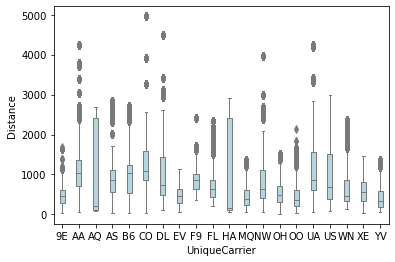

In [62]:
sns.boxplot(x=dfr["UniqueCarrier"],y=dfr["Distance"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

Como se puede ver CO tiene el vuelo mas largo

### Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

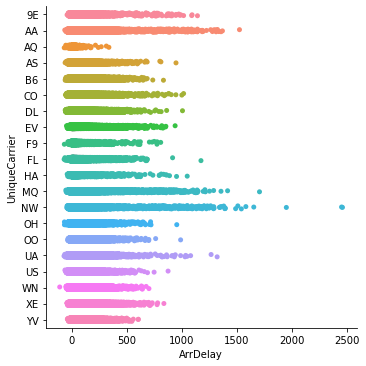

In [63]:
sns.catplot(x="ArrDelay", y="UniqueCarrier", data=dfr)

Como se puede ver Mq tiene el retraso mas grande y NW, YV tienen retrasos negativos es decir llegan antes de la hora

<AxesSubplot:xlabel='ArrDelay', ylabel='UniqueCarrier'>

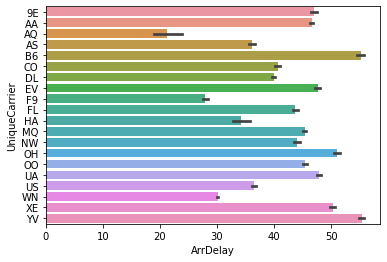

In [64]:
sns.barplot(x="ArrDelay", y="UniqueCarrier", data=dfr)

In [65]:
sns.set_style("whitegrid")

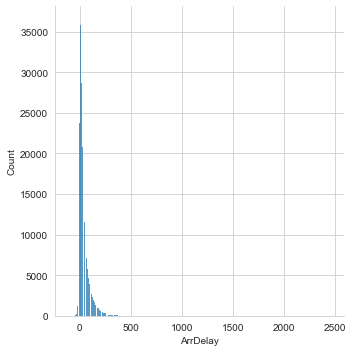

In [66]:
sns.displot(dfr['ArrDelay'])

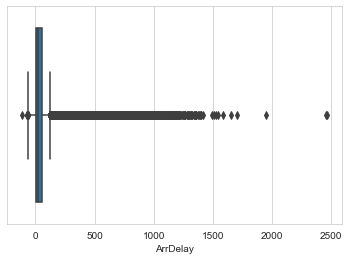

In [67]:
ax = sns.boxplot(x=dfr['ArrDelay'])

In [68]:
sns.pairplot(dfr, hue="ArrDelay")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000149F1AEE5E0> (for post_execute):


KeyboardInterrupt: 

In [69]:
len(dfr.UniqueCarrier.value_counts())

20

<AxesSubplot:xlabel='UniqueCarrier', ylabel='VelocidadMedial'>

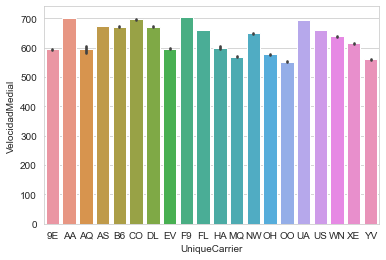

In [70]:
sns.barplot(x="UniqueCarrier", y="VelocidadMedial", data=dfr)

<AxesSubplot:xlabel='UniqueCarrier', ylabel='VelocidadMedial'>

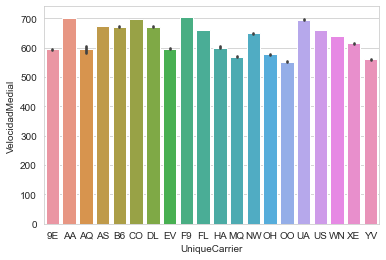

In [71]:
sns.barplot(x="UniqueCarrier", y="VelocidadMedial", data=dfr)

Como se puede ver UniCarrier oo Tienen el menor velocidad media y AA tiene la mayor velocidad media


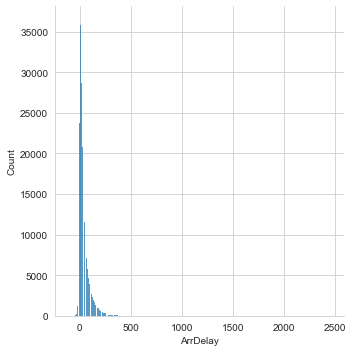

In [72]:
sns.displot(dfr, x="ArrDelay")

### Dues variables numèriques (ArrDelay i DepDelay)

In [73]:
### Trasnformo depdelay

In [74]:
dfr['DepDelay']=dfr[dfr['DepDelay'].notnull()]['DepDelay'].apply(lambda s: int(s[:s.find(".")]))

In [75]:
### Tres variables (ArrDelay, DepDelay i UniqueCarrier)

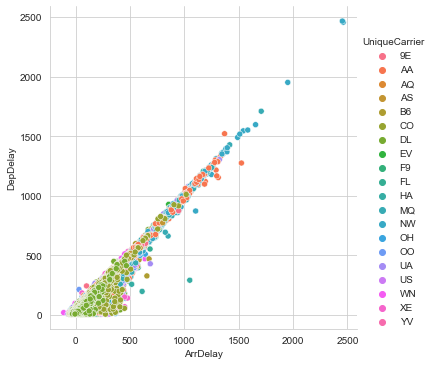

In [76]:
sns.relplot(x="ArrDelay", y="DepDelay", hue="UniqueCarrier",
            
            data=dfr);

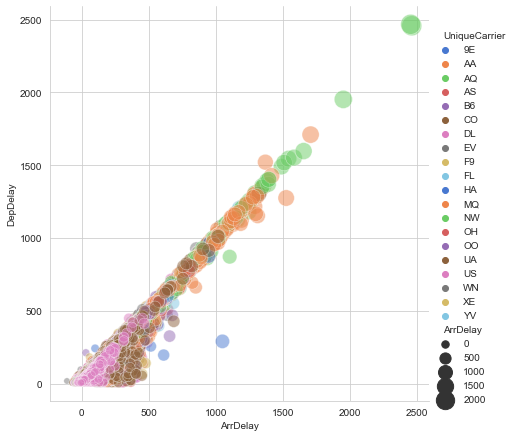

In [77]:
sns.relplot(x="ArrDelay", y="DepDelay", hue="UniqueCarrier", size="ArrDelay",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dfr)

SyntaxError: invalid syntax (<ipython-input-78-a9bd5e9e8983>, line 1)

In [79]:
dfr['DepDelay']

0           8
1          19
2           8
4          34
5          25
           ..
7009710    30
7009717    57
7009718    80
7009726    11
7009727     7
Name: DepDelay, Length: 1936758, dtype: int64

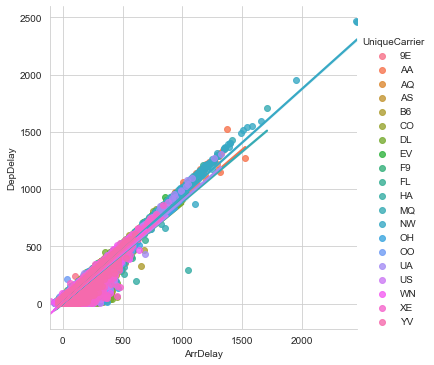

In [80]:
g = sns.lmplot(
    data=dfr,
    x="ArrDelay", y="DepDelay", hue="UniqueCarrier",
    height=5
)

Como se puede Ver hay corelacion entre salida y llegada con el por los trestrasos

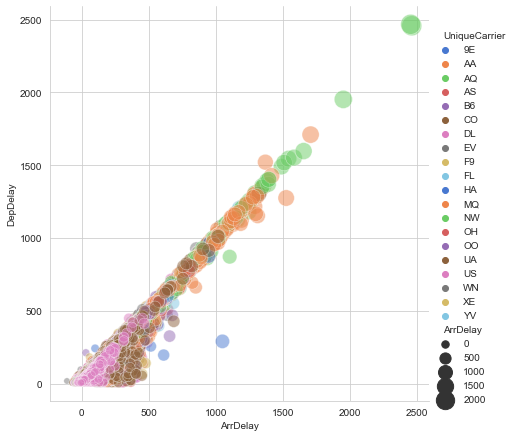

In [81]:
sns.relplot(x="ArrDelay", y="DepDelay", hue="UniqueCarrier", size="ArrDelay",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dfr)

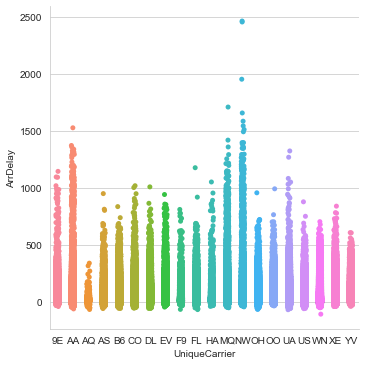

In [82]:
sns.catplot(x="UniqueCarrier", y="ArrDelay", data=dfr)

Calculo valores medios. COn los valores medios los graficos se hacen en un momento y no se tardan tanto en procesar


In [97]:
dfr_mediaAtUC = dfr[['ArrDelay','UniqueCarrier']].groupby('UniqueCarrier').mean()

In [100]:
dfr_mediaAtUC

,ArrDelay
UniqueCarrier,
9E,46.936493
AA,46.561553
AQ,21.255376
AS,36.060882
B6,55.088739
CO,40.568449
DL,39.881507
EV,47.554255
F9,27.938953


In [98]:
dfr_mediaDdUC=dfr[['DepDelay','UniqueCarrier']].groupby('UniqueCarrier').mean()

In [99]:
dfr_mediaDdUC


,DepDelay
UniqueCarrier,
9E,47.370338
AA,46.481953
AQ,26.680000
AS,38.300435
B6,55.030570
CO,43.138680
DL,39.059306
EV,48.308463
F9,27.701227


In [102]:
result = pd.merge(dfr_mediaDdUC, dfr_mediaAtUC, on="UniqueCarrier")

In [103]:
result

,DepDelay,ArrDelay
UniqueCarrier,,
9E,47.370338,46.936493
AA,46.481953,46.561553
AQ,26.680000,21.255376
AS,38.300435,36.060882
B6,55.030570,55.088739
CO,43.138680,40.568449
DL,39.059306,39.881507
EV,48.308463,47.554255
F9,27.701227,27.938953


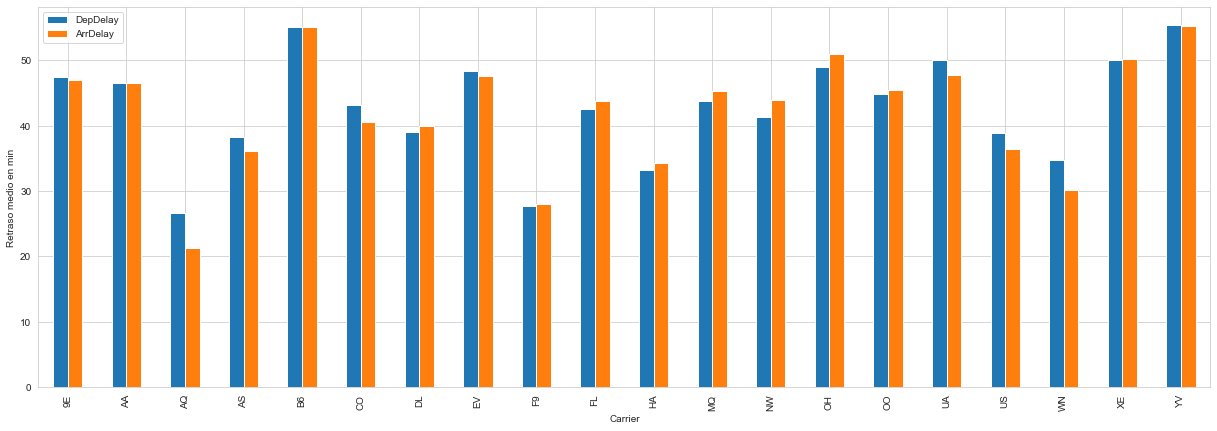

In [104]:
result.plot.bar(figsize=(21,7),xlabel='Carrier', ylabel='Retraso medio en min')
plt.savefig('DepdArrdBar.jpg')
plt.show()

### Tres variables (ArrDelay, DepDelay i UniqueCarrier)

Calculo valores medios

In [105]:
dfr_mediaAtUc = dfr[['AirTime','UniqueCarrier']].groupby('UniqueCarrier').mean()

In [106]:
resultAtUCDD=pd.merge(result, dfr_mediaAtUc, on="UniqueCarrier")

In [107]:
resultAtUCDD

,DepDelay,ArrDelay,AirTime
UniqueCarrier,,,
9E,47.370338,46.936493,72.970389
AA,46.481953,46.561553,144.382547
AQ,26.680000,21.255376,114.818548
AS,38.300435,36.060882,129.628172
B6,55.030570,55.088739,150.179845
CO,43.138680,40.568449,165.511486
DL,39.059306,39.881507,132.078995
EV,48.308463,47.554255,72.291749
F9,27.701227,27.938953,122.229875


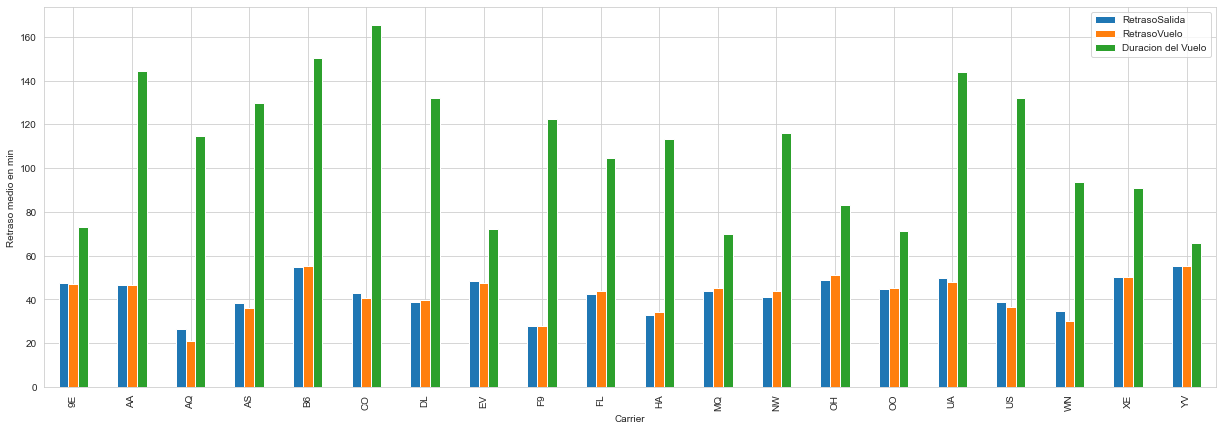

In [115]:
resultAtUCDD.plot.bar(figsize=(21,7),xlabel='Carrier', ylabel='Retraso medio en min')
plt.legend(labels=['RetrasoSalida','RetrasoVuelo','Duracion del Vuelo'])
plt.savefig('DDAdAtbar.jpg')
plt.show()

Visalizacion de variables faltantes

In [116]:
import missingno as msno 

<AxesSubplot:>

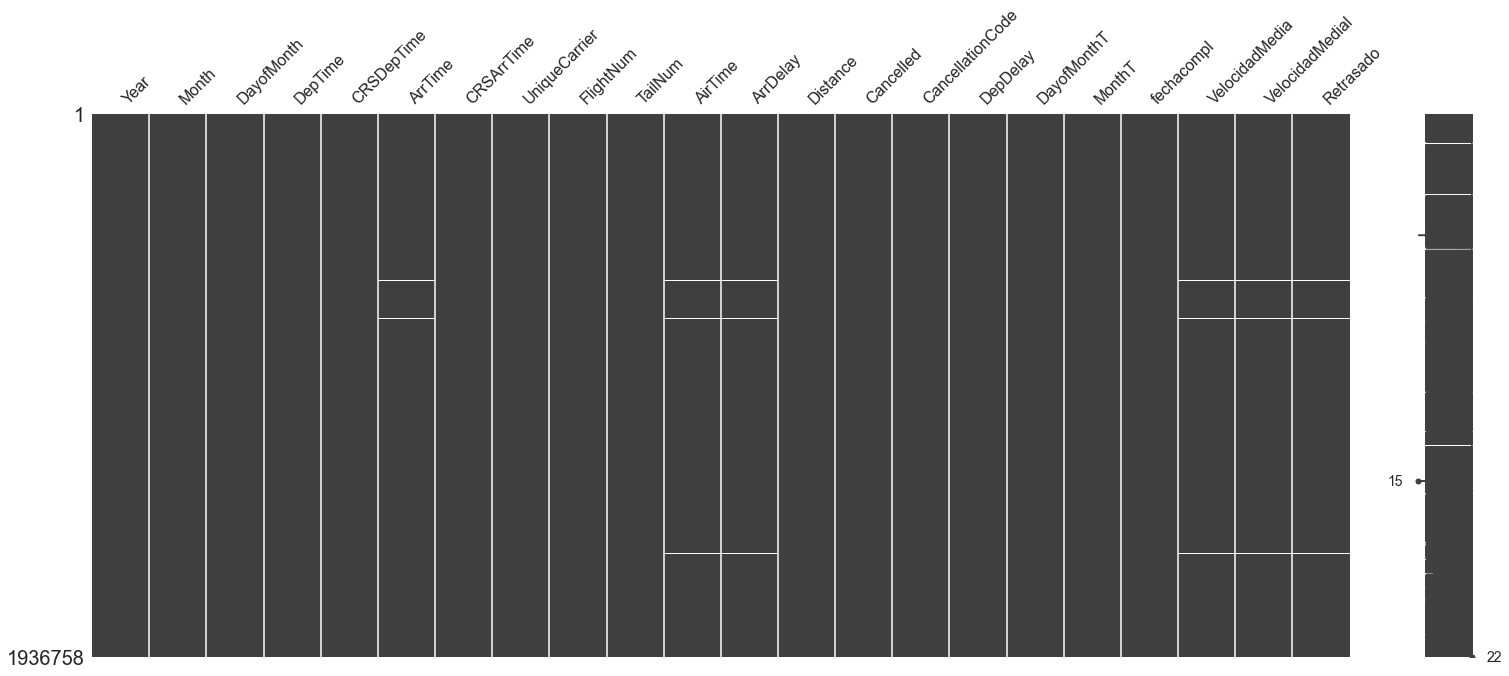

In [119]:
msno.matrix(dfr) 

- A value near -1 means if one variable appears then the other variable is very likely to be missing.
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.
- A value near 1 means if one variable appears then the other variable is very likely to be present.

<AxesSubplot:>

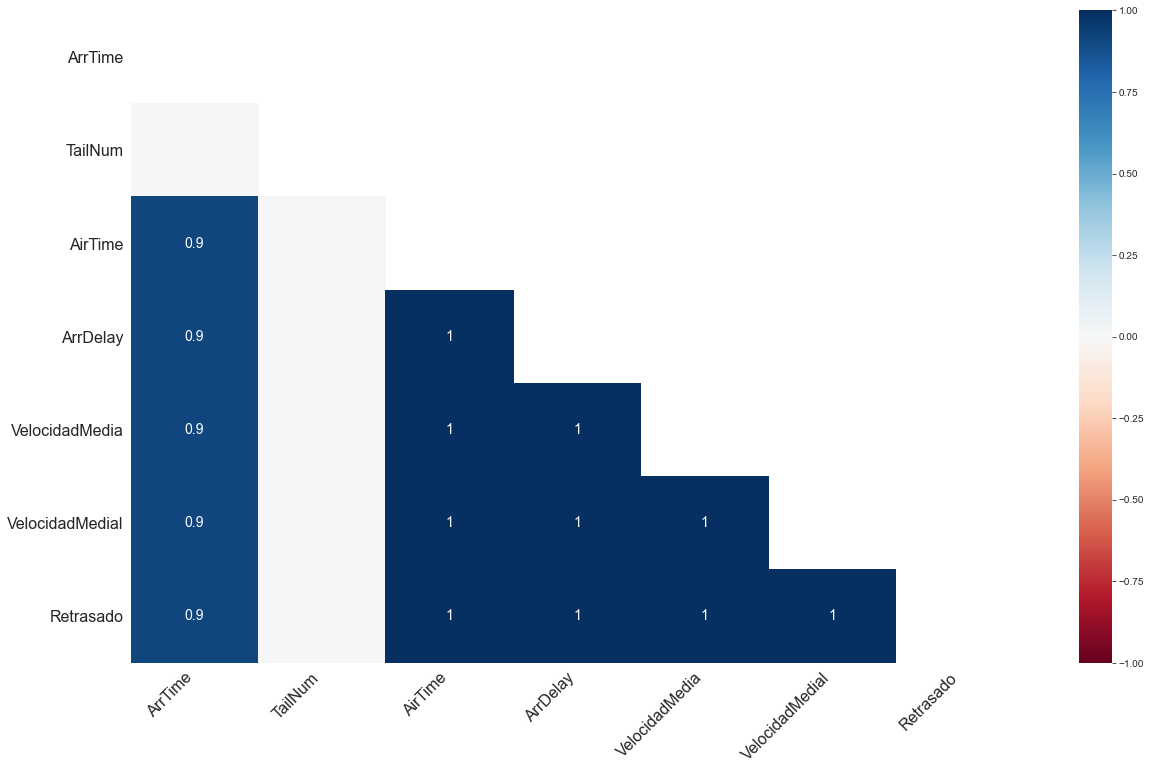

In [118]:
msno.heatmap(dfr) 

Exporta el data set net i amb les noves columnes a Excel.

In [122]:


dfr.to_csv('DatosExportados.csv')

